In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats

%matplotlib inline

In [3]:
df1 = pd.read_csv('5_task_1.csv')
df1

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38
...,...,...,...
29995,22932,C,38
29996,21787,C,25
29997,5054,C,34
29998,10254,C,27


In [4]:
df2 = pd.read_csv('5_task_2.csv')
df2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


In [5]:
df1.dtypes

id         int64
group     object
events     int64
dtype: object

In [6]:
df2.dtypes

id           int64
group       object
segment     object
events     float64
dtype: object

# Experiment 1:

## Проверяем, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными), с помощью теста Левена:

In [14]:
a = df1[df1.group == 'A'].events
a

0       14
1       41
2       30
3       37
4       38
        ..
9995    25
9996    25
9997    30
9998    21
9999    21
Name: events, Length: 10000, dtype: int64

In [15]:
b = df1[df1.group == 'B'].events
c = df1[df1.group == 'C'].events

In [16]:
scipy.stats.levene(a, b, c)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

## Убедимся, что данные распределены нормально, применив тест Шапиро-Уилка:

In [17]:
a_sample = df1[df1.group == 'A'].events.sample(1000, random_state=17)
a_sample

2688    48
233     51
9099    53
8652    29
2842    34
        ..
4536    33
7441    20
6372    42
1945    27
9493    28
Name: events, Length: 1000, dtype: int64

In [18]:
b_sample = df1[df1.group == 'B'].events.sample(1000, random_state=17)
c_sample = df1[df1.group == 'C'].events.sample(1000, random_state=17)

In [19]:
stats.shapiro(a_sample)

(0.9973153471946716, 0.09609563648700714)

In [20]:
stats.shapiro(b_sample)

(0.9980798363685608, 0.31768906116485596)

In [21]:
stats.shapiro(c_sample)

(0.9981185793876648, 0.3359004259109497)

## Считаем F:

In [22]:
scipy.stats.f_oneway(a, b, c)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

## С помощью критерия Тьюки определим, между какими группами есть статистически значимые различия:

In [24]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [26]:
print(pairwise_tukeyhsd(df1.events, df1.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


# Experiment 2:

In [27]:
df2

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0
...,...,...,...,...
99995,60695,control,low,15.0
99996,5934,control,low,16.0
99997,30046,control,low,22.0
99998,26474,control,low,21.0


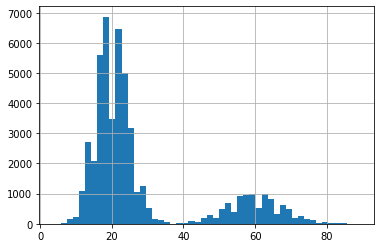

In [30]:
df2[df2.group == 'control'].events.hist(bins=50)

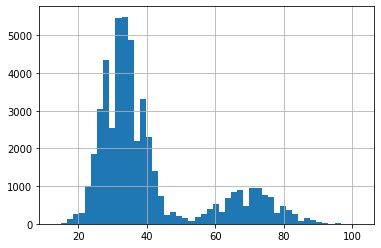

In [31]:
df2[df2.group == 'test'].events.hist(bins=50)

In [35]:
test_high = df2[(df2.group == 'test') & (df2.segment == 'high')].events
test_low = df2[(df2.group == 'test') & (df2.segment == 'low')].events
control_high = df2[(df2.group == 'control') & (df2.segment == 'high')].events
control_low = df2[(df2.group == 'control') & (df2.segment == 'low')].events

In [36]:
control_high.describe()

count    10000.000000
mean        59.970800
std          7.805347
min         31.000000
25%         55.000000
50%         60.000000
75%         65.000000
max         89.000000
Name: events, dtype: float64

In [37]:
df2['combination'] = df2.group + df2.segment
df2

,id,group,segment,events,combination
0,83440,test,high,78.0,testhigh
1,96723,test,high,71.0,testhigh
2,68719,test,high,80.0,testhigh
3,50399,test,high,80.0,testhigh
4,95613,test,high,78.0,testhigh
...,...,...,...,...,...
99995,60695,control,low,15.0,controllow
99996,5934,control,low,16.0,controllow
99997,30046,control,low,22.0,controllow
99998,26474,control,low,21.0,controllow


## Проводим тест (многофакторный):

In [38]:
from statsmodels.stats.multicomp import MultiComparison

In [39]:
Multicomp = MultiComparison(df2.events, df2.combination)

In [40]:
print(Multicomp.tukeyhsd().summary())

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1     group2   meandiff p-adj  lower    upper   reject
--------------------------------------------------------------
controlhigh controllow -39.9392 0.001 -40.1073 -39.7711   True
controlhigh   testhigh   9.9677 0.001   9.7551  10.1803   True
controlhigh    testlow -26.9449 0.001  -27.113 -26.7768   True
 controllow   testhigh  49.9069 0.001  49.7388   50.075   True
 controllow    testlow  12.9944 0.001   12.888  13.1007   True
   testhigh    testlow -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------


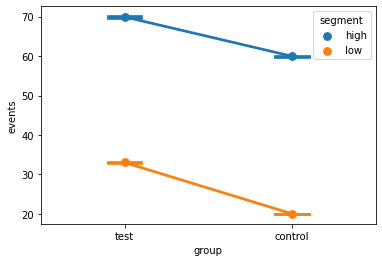

In [41]:
sns.pointplot(x='group', y='events', hue='segment', data=df2, capsize=.2)

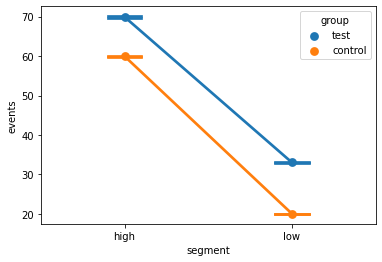

In [42]:
sns.pointplot(x='segment', y='events', hue='group', data=df2, capsize=.2)